## Customizable Graph Session use of Tensorflow

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot= True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images[1].shape

(784,)

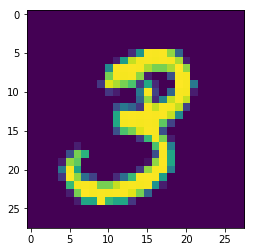

In [12]:
plt.imshow(mnist.train.images[1].reshape(28,28))

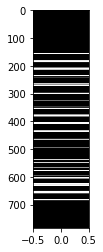

In [22]:
#we shall be feeding the following structure of data to NN
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.005)

In [23]:
#we will be feeding the whole dataset in batches
x= tf.placeholder(tf.float32,shape=[None,784])

In [24]:
#weights for 10 labels
W = tf.Variable(tf.zeros([784,10]))

In [25]:
b= tf.Variable(tf.zeros([10]))

In [26]:
y= tf.matmul(x,W)+b

In [29]:
#It's one hot encoding
#mnist.train.labels[1]
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [30]:
#Loss function (finding error)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [31]:
#Optimization (minimize error)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [33]:
train = optimizer.minimize(cross_entropy)

In [34]:
#for initialisation of variables
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100) #built-in batch feeder from mnist
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc= tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.919


Next, we shall try different approach of tensorflow.